In [84]:
#  importing tensorflow and keras directories
import tensorflow as tf
from tensorflow import keras
from keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

#  importing utilities from keras
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot

In [85]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
import livelossplot

In [87]:
#loading the mnist dataset

(X_train, y_train) , (X_test,y_test) = mnist.load_data()

In [88]:
# data Preprocessing

# checking the shape of test and train datas
X_train.shape

(60000, 28, 28)

In [89]:
X_test.shape

(10000, 28, 28)

In [90]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

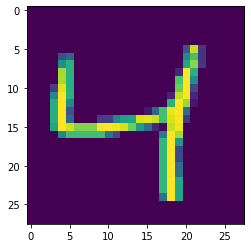

In [91]:
# visualising the data

import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [92]:
# checking the corresponding label
print(y_train[2])

4


In [93]:
# defining parameters
NUM_ROWS = 28          #  this we have seen earlier
NUM_COLUMNS = 28       #  this we have seen earlier
NUM_CLASSES = 10        # labels range from 0 to 10
BATCH_SIZE = 128       # this is a hyperparameter; this is the number of instances that will be processed in one go
EPOCH = 15             # the number of times the oterations happen 


In [94]:
# converting the labels into categorical data

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

In [95]:
# currently , the image is on a 2D array whereas the input is 1D. So we have to reshape the values to 1D.

X_train = X_train.reshape(X_train.shape[0],NUM_ROWS*NUM_COLUMNS)


In [96]:
print(X_train.shape)

(60000, 784)


In [97]:
# taking the 10th image and checking the 129 index ( both 10th image and 129th index is taken at random just for illustration)
X_train[10][129]

6

In [98]:
# standardising the values
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


In [100]:
# rechecking if this standardisation has happened
print(X_train[10][129])

0.023529412


In [101]:
#build Neural

model = models.Sequential()
model.add(Dense(512,activation = 'relu',input_shape = (NUM_ROWS*NUM_COLUMNS,)))
model.add(Dense(10,activation = 'softmax'))


In [102]:
# model evaluation

model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy',metrics = ['Accuracy'])

In [103]:
# fitting the model

model.fit(X_train,y_train,batch_size = BATCH_SIZE, epochs = EPOCH)

Epoch 1/15
469/469 [==============================] - 5s 10ms/step - loss: 1.0714 - Accuracy: 0.7674
Epoch 2/15
469/469 [==============================] - 5s 10ms/step - loss: 0.5121 - Accuracy: 0.8766
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.4140 - Accuracy: 0.8924
Epoch 4/15
469/469 [==============================] - 4s 10ms/step - loss: 0.3692 - Accuracy: 0.9007
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.3413 - Accuracy: 0.9068
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3214 - Accuracy: 0.9115
Epoch 7/15
469/469 [==============================] - 5s 10ms/step - loss: 0.3058 - Accuracy: 0.9152
Epoch 8/15
469/469 [==============================] - 5s 10ms/step - loss: 0.2930 - Accuracy: 0.9185
Epoch 9/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2818 - Accuracy: 0.9220
Epoch 10/15
469/469 [==============================] - 5s 10ms/step - loss: 0.2724 - Accuracy:

In [104]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
